In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df =pd.read_csv('pokemon.csv')
df.columns = df.columns.str.upper().str.replace('_', '')
df = df.set_index(['NAME']) 
df.index = df.index.str.replace(".*(?=Mega)", "")
df=df.drop(['#'],axis=1)
df['TYPE 2'].fillna(df['TYPE 1'], inplace=True)
df_meanG=(df.groupby(['GENERATION']).mean()) 
df_meanG=df_meanG.drop(["LEGENDARY","TOTAL"],axis=1)
df_meanT=(df.groupby(['TYPE 1']).mean())
df_meanT=df_meanT.drop(["LEGENDARY","TOTAL","GENERATION"],axis=1)

# Plot 1- Bar

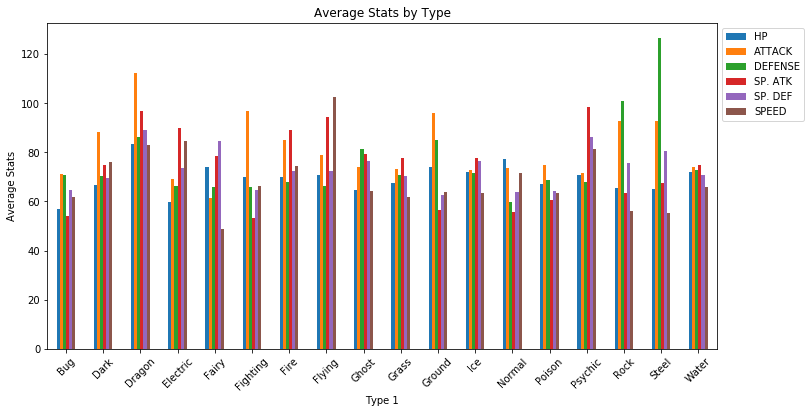

In [5]:
interesting_columns = ['HP', 'ATTACK', 'DEFENSE', 'SP. ATK', 'SP. DEF', 'SPEED']

df_meanT.plot(kind='bar',y=interesting_columns, 
             rot=45,figsize=(20,5),
            xticks=range(len(df_meanT)))
plt.xlabel('Type 1')
plt.ylabel('Average Stats')
plt.title("Average Stats by Type")
plt.legend(bbox_to_anchor=(1,1),loc=2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.plot()
plt.show()

Looking at the chart, its clear that the average stats differ by type of Pokemon, with many types having at least one stat that is higher than average than the other stats for that type. For example, Steel Pokemon have a higher average Defense than its other stats (and higher average stat value of all Pokemon types). Additionally, most types do not have the same average for each stat, likely to balance out high stats and low stats. Water pokemon however, have similar averages for each stat. It would be intersting to see how these averages change from generation to generation. 

# Plot 2- Subplots

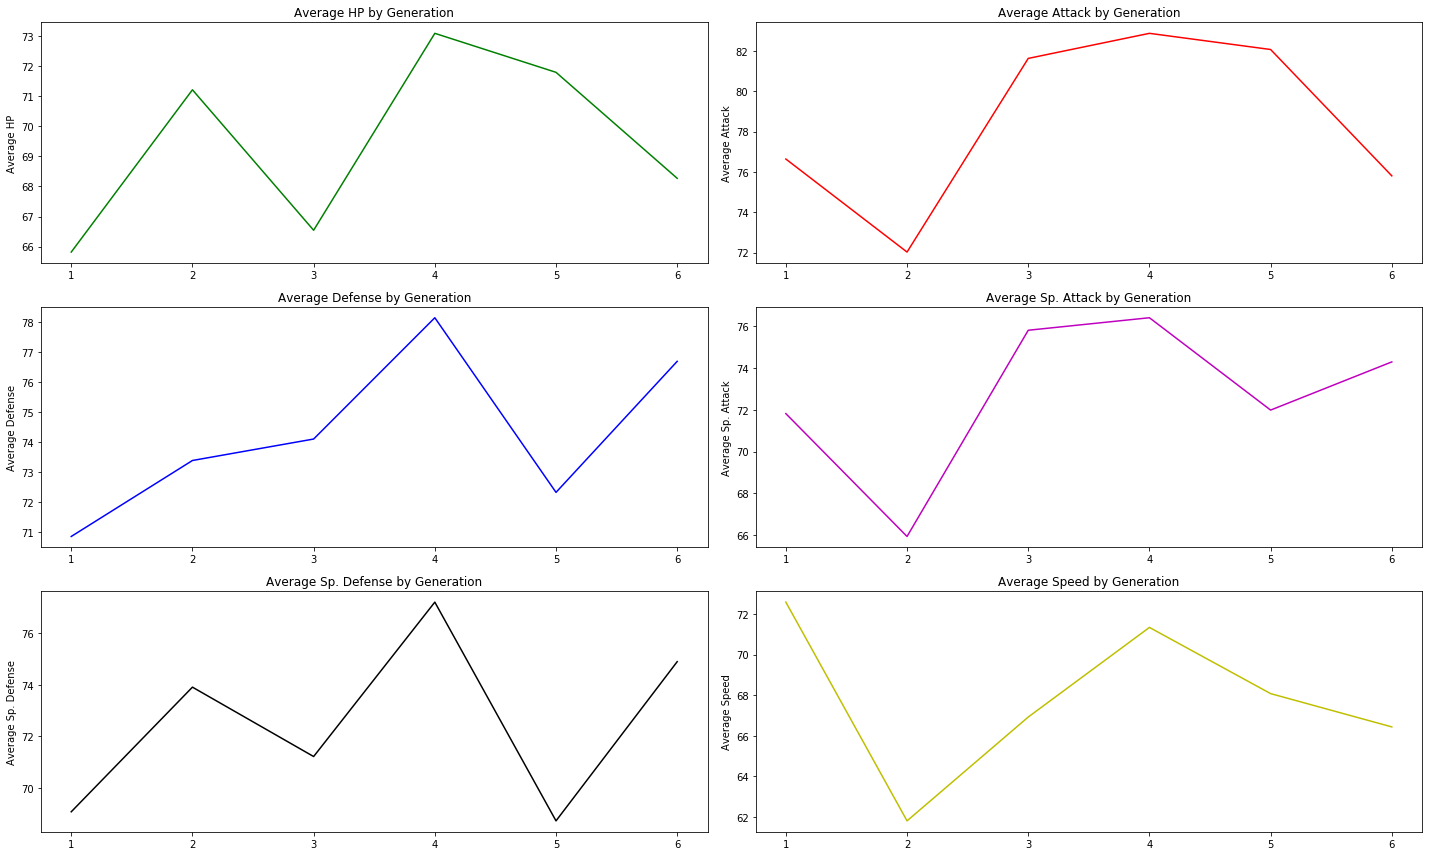

In [6]:
plt.figure(figsize=(20,12))
plt.subplot(3,2,1)
plt.plot(df_meanG.index, df_meanG['HP'], color='g',label="Average HP") 
plt.ylabel('Average HP')
plt.title('Average HP by Generation')

plt.subplot(3,2,2)
plt.plot(df_meanG.index, df_meanG['ATTACK'], color='r',label="Average Attack")
plt.ylabel('Average Attack')
plt.title('Average Attack by Generation')

plt.subplot(3,2,3)
plt.plot(df_meanG.index, df_meanG['DEFENSE'], color='b',label="Average Defense")
plt.ylabel('Average Defense')
plt.title('Average Defense by Generation')

plt.subplot(3,2,4)
plt.plot(df_meanG.index, df_meanG['SP. ATK'], color='m',label="Average Sp. Attack")
plt.ylabel('Average Sp. Attack')
plt.title('Average Sp. Attack by Generation')

plt.subplot(3,2,5)
plt.plot(df_meanG.index, df_meanG['SP. DEF'], color='k',label="Average Sp. Defense")
plt.ylabel('Average Sp. Defense')
plt.title('Average Sp. Defense by Generation')
                                  
plt.subplot(3,2,6)
plt.plot(df_meanG.index, df_meanG['SPEED'], color='y',label="Average Speed")
plt.ylabel('Average Speed')
plt.title('Average Speed by Generation')

plt.tight_layout()
plt.show()

This plot shows that the average stat power of Pokemon change based on the generation of Pokemon introduced. Generation 4 Pokemon have the highest stat power, on average, than any other Gen (with the exception of Gen 1 Speed). Also, it appears that Defense and Sp. Defense, and Attack and Sp. Attack tend to follow similar trends from generation to generation. 

# Plot 3- Pie

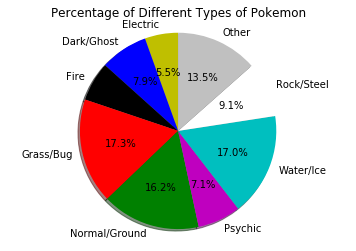

In [7]:
labels1='Electric','Dark/Ghost','Fire','Grass/Bug','Normal/Ground','Psychic','Water/Ice','Rock/Steel','Other'
sizes1= [44,63,52,139,130,57,136,73,108]
colors = ['y', 'b', 'k','r','g','m','c','w','silver']
plt.pie(sizes1, labels=labels1, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title("Percentage of Different Types of Pokemon")
plt.plot()
plt.show()

This pie chart shows a distribution of Pokemon by Type (similar types grouped). Grass/Bug, Normal/Ground, and Water/Ice Type Pokemon all make up similar %s (accounting for about 50% of all Pokemon types). An additional examination could be using subplots to break this down by Generation. Additionally, I could look at the Total average power for each type, to see whether the types that make up a smaller % have a higher power overall.

# Plot 4- Box and Whisker

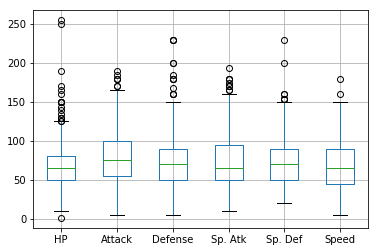

In [2]:
df =pd.read_csv('pokemon.csv')
interesting_columns = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
df.boxplot(column=interesting_columns)

Looking at this Box and Whisker plot, HP has the lowest mean stat power, and out of all stats, has the smallest IQR, from which I can infer that the obersations lie very close together. However, HP has the longest tail (most outliers), from which I can assume that HP is not a normal distribution, but skewed right. Speed appears to have the most normal distribution, and has the fewest outliers. 